In [3]:
#Name: Jackson Rakena
#ID: 300609159


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

ads = pd.read_csv('Advertising.csv')
ads

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
# (a)
ads = pd.read_csv('Advertising.csv')
ads = ads.set_index('Unnamed: 0')
ads

,TV,Radio,Newspaper,Sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


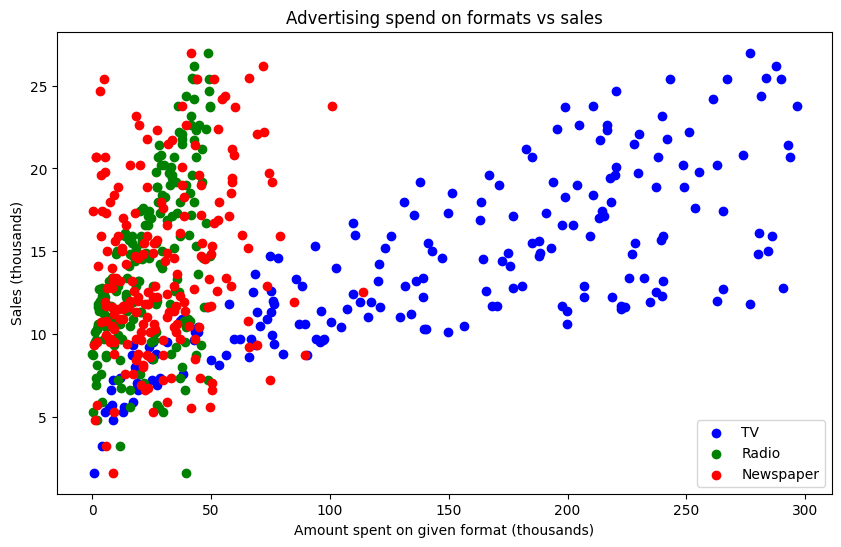

In [5]:
# (b)
plt.figure(figsize=(10, 6))
plt.scatter(ads['TV'], ads['Sales'], color='blue', label='TV')
plt.scatter(ads['Radio'], ads['Sales'], color='green', label='Radio')
plt.scatter(ads['Newspaper'], ads['Sales'], color='red', label='Newspaper')

plt.xlabel('Amount spent on given format (thousands)')
plt.ylabel('Sales (thousands)')
plt.title('Advertising spend on formats vs sales')
plt.legend()

plt.show()

TV seems to have the most linear relationship, showing a clear upwards trend in sales when more is spent on that format.

Newspaper seems to have the least linear relationship, as sales numbers are spread seemingly randomly in the space of 0-100 on the x axis.

In [6]:
# (c)
X = ads[['TV', 'Radio', 'Newspaper']]
y = ads['Sales']

X

,TV,Radio,Newspaper
Unnamed: 0,,,
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4


In [7]:
y

Unnamed: 0
1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

In [8]:
#(d)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [9]:
#(e)
from sklearn.linear_model import LinearRegression

lrg = LinearRegression()

In [10]:
#(f)
lrg.fit(x_train, y_train)

LinearRegression()

In [11]:
#(g)
print(f'Intercept: {lrg.intercept_}')
print(f'Coefficients: {lrg.coef_}')

feature_coefficients = list(zip(X.columns, lrg.coef_))
print(feature_coefficients)

Intercept: 2.7092040998277422
Coefficients: [ 0.04814797  0.18231412 -0.0006547 ]
[('TV', 0.04814797130249296), ('Radio', 0.1823141218346385), ('Newspaper', -0.0006547010864298163)]


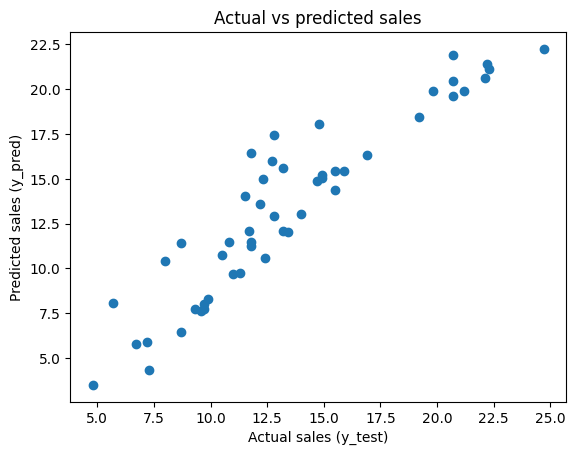

In [12]:
#(h)
y_pred = lrg.predict(x_test)

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('Actual sales (y_test)')
plt.ylabel('Predicted sales (y_pred)')
plt.title('Actual vs predicted sales')
plt.show()

#### (h)
There is a moderate linear relationship between y_test and y_pred, which shows good results. It shows that the model is performing well, and accurately predicting the correct results.

In [13]:
#(i)
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean absolute error (MAE): {mae}")
print(f"Mean squared error (MSE): {mse}")
print(f"Root mean squared error (RMSE): {rmse}")


Mean absolute error (MAE): 1.4764964933370215
Mean squared error (MSE): 3.3566275671213255
Root mean squared error (RMSE): 1.832110140554144


Intercept: 2.5801033626753487
Coefficients: [0.0469723  0.19306856]
[('TV', 0.04697229887924258), ('Radio', 0.19306855879021054)]


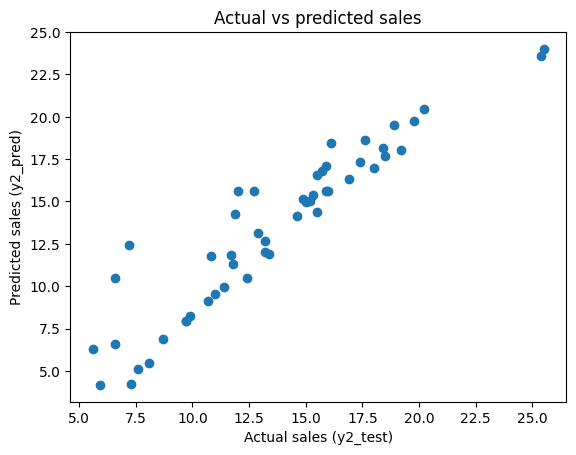

Mean absolute error (MAE): 1.293192842207745
Mean squared error (MSE): 2.8908655997203248
Root mean squared error (RMSE): 1.7002545690926183


In [14]:
#(j)
X2 = ads[['TV', 'Radio']]
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y)

lrg2 = LinearRegression()
lrg2.fit(x2_train, y2_train)
print(f'Intercept: {lrg2.intercept_}')
print(f'Coefficients: {lrg2.coef_}')
feature_coefficients = list(zip(X2.columns, lrg2.coef_))
print(feature_coefficients)

y2_pred = lrg2.predict(x2_test)
plt.figure()
plt.scatter(y2_test, y2_pred)
plt.xlabel('Actual sales (y2_test)')
plt.ylabel('Predicted sales (y2_pred)')
plt.title('Actual vs predicted sales')
plt.show()

mae = metrics.mean_absolute_error(y2_test, y2_pred)
mse = metrics.mean_squared_error(y2_test, y2_pred)
rmse = np.sqrt(mse)

print(f"Mean absolute error (MAE): {mae}")
print(f"Mean squared error (MSE): {mse}")
print(f"Root mean squared error (RMSE): {rmse}")

#### (j)
Yes, we see a strong improvement in all of the metrics and a more linear relationship visible on the graph.

This is because TV and Radio have a more linear relationship, which we saw in question (b) on the graph. This allows LinearRegression, which is a linear model, to more accurately capture this relationship.

Intercept: 6.861590708387421
Coefficients: [0.0471126]
[('TV', 0.047112603264539095)]


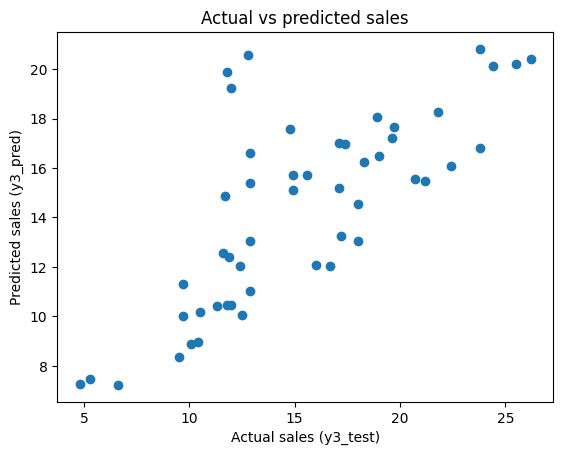

Mean absolute error (MAE): 2.741182279307343
Mean squared error (MSE): 12.30232436684697
Root mean squared error (RMSE): 3.507466944512374


In [43]:
#(j)
X3 = ads[['TV']]
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y)

lrg3 = LinearRegression()
lrg3.fit(x3_train, y3_train)
print(f'Intercept: {lrg3.intercept_}')
print(f'Coefficients: {lrg3.coef_}')
feature_coefficients = list(zip(X3.columns, lrg3.coef_))
print(feature_coefficients)

y3_pred = lrg3.predict(x3_test)
plt.figure()
plt.scatter(y3_test, y3_pred)
plt.xlabel('Actual sales (y3_test)')
plt.ylabel('Predicted sales (y3_pred)')
plt.title('Actual vs predicted sales')
plt.show()

mae = metrics.mean_absolute_error(y3_test, y3_pred)
mse = metrics.mean_squared_error(y3_test, y3_pred)
rmse = np.sqrt(mse)

print(f"Mean absolute error (MAE): {mae}")
print(f"Mean squared error (MSE): {mse}")
print(f"Root mean squared error (RMSE): {rmse}")

#### (k)
We see a decline in significant performance in terms of RMSE compared to the two other runs. This is because the TV data is less linearly representable (as we saw in the initial plot of advertising spend), so the model struggles to create an accurate representation of it.

## Option A: Question 2

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()

In [16]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Feature names is the names of all of the features of the data set (i.e. information that we will use to classify the instance)

In [17]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Data is the raw data of the dataset. It contains one array for each instance, indexed by the features.

In [18]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Target contains the target classification for each row. For each number `i` between 0 and `len(target)-1`, `target[i]` is the *correct* classification for the feature set at `iris.data[i]`.

In [19]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Target names contains the human-readable "names" for each target. For each number `i` between 0 and `len(target)-1`, `iris.target_names[target[i]]` is the "label" (or human-readable name) for the correct classification for the feature set at `iris.data[i]`.

In [20]:
#(b)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
#(c)
print(knn)

KNeighborsClassifier(n_neighbors=1)


In [22]:
#(d)
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)
x_train

array([[5. , 3.2, 1.2, 0.2],
       [5. , 2. , 3.5, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [4.9, 3.6, 1.4, 0.1],
       [6.1, 2.8, 4.7, 1.2],
       [5.1, 3.5, 1.4, 0.3],
       [6. , 2.9, 4.5, 1.5],
       [7.1, 3. , 5.9, 2.1],
       [6.3, 2.3, 4.4, 1.3],
       [5.1, 3.3, 1.7, 0.5],
       [5.9, 3. , 5.1, 1.8],
       [5.6, 2.9, 3.6, 1.3],
       [5.3, 3.7, 1.5, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [6.1, 2.6, 5.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.6, 3.6, 1. , 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [5.6, 2.8, 4.9, 2. ],
       [4.9, 2.5, 4.5, 1.7],
       [6.9, 3.2, 5.7, 2.3],
       [6.3, 2.7, 4.9, 1.8],
       [5.5, 4.2, 1.4, 0.2],
       [6.6, 2.9, 4.6, 1.3],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 3.4, 5.4, 2.3],
       [5. , 3.6, 1.4, 0.2],
       [6.4, 2.7, 5.3, 1.9],
       [6. , 2.2, 5. , 1.5],
       [6.7, 3.3, 5.7, 2.5],
       [4.4, 2.9, 1.4, 0.2],
       [6. , 2.7, 5.1, 1.6],
       [6.7, 3.1, 4.4, 1.4],
       [6.3, 3

In [23]:
#(e)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
#(f)
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2,
       0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2,
       0, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 2, 2])

In [25]:
#(g)
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [26]:
#(h)
knn2 = KNeighborsClassifier(n_neighbors=20)
knn2.fit(x_train, y_train)
y2_pred = knn2.predict(x_test)
print(metrics.accuracy_score(y_test, y2_pred))

0.9666666666666667


K=20 has slightly better classification accuracy.

In [27]:
#(i)
accs = []
for k in range(1,31):
    knnx = KNeighborsClassifier(n_neighbors=k)
    knnx.fit(x_train, y_train)
    y_pred = knnx.predict(x_test)
    accs.append(metrics.accuracy_score(y_test, y_pred))
print(accs)
print()
print(f"Highest accuracy: n={np.argmax(accs)+1} (accuracy={np.max(accs)})")
print(f"Lowest accuracy: n={np.argmin(accs)+1} (accuracy={np.min(accs)})")

[0.95, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.95, 0.9666666666666667, 0.95]

Highest accuracy: n=10 (accuracy=1.0)
Lowest accuracy: n=1 (accuracy=0.95)


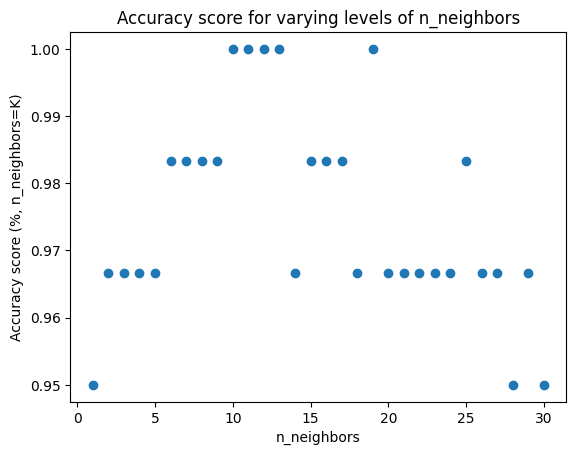

In [28]:
plt.figure()
plt.scatter(range(1,31), accs)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy score (%, n_neighbors=K)')
plt.title('Accuracy score for varying levels of n_neighbors')
plt.show()